In [1]:
from math import exp
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import csv

Open report file, recalling that $s$ corresponds to the probability of survival until size $\Lambda$.

`m_array` $= - \log_2 (p)$

`p_log_s` $= - p \cdot \log \big( s \big)$

In [8]:
with open('./frobose.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    m_array = []
    minus_p_log_s = []
    for row in reader:
        print([int(row[0]), float(row[1])])
        m_array.append(int(row[0]))
        minus_p_log_s.append(float(row[1]))

[2, 0.925324331822325]
[3, 1.200173751497779]
[4, 1.557884737355841]
[5, 1.912798014124641]
[6, 2.225971722455377]
[7, 2.484697632630407]
[8, 2.689792911363215]
[9, 2.847810248280811]
[10, 2.967113696774968]
[11, 3.055852074648786]


Generate the $p$ array and convert all of them to np arrays. Also

`minus_log_s`:
$$
- \log(s)
$$

In [9]:
p = []
for m in m_array:
    p.append(2**(-m))

minus_p_log_s = np.array(minus_p_log_s)
p = np.array(p)
minus_log_s = np.divide(minus_p_log_s, p)

**Report A** - Estimate $\alpha$:

Suppose that
$$
s \sim \exp \{ -a p^{-\alpha} \},
$$
we get
$$
-\log(-\log(s)) \sim -\log(a) - \alpha (- \log(p))
$$
Define `minux_log_p` $= - \log (p)$

`minus_log_minus_log_s` $= -\log(-\log(s))$

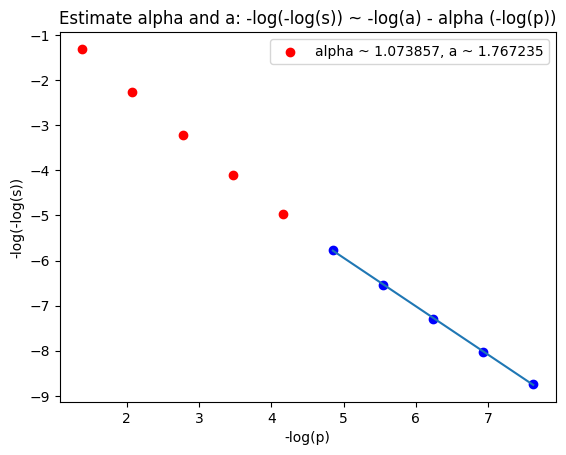

In [10]:
truncateA = len(m_array) - 5

minus_log_p = -np.log(p)
minus_log_minus_log_s = -np.log(minus_log_s)
reg = LinearRegression().fit(minus_log_p[truncateA:].reshape(-1,1), minus_log_minus_log_s[truncateA:])
coef = reg.coef_[0]
inter = reg.intercept_

plt.title("Estimate alpha and a: -log(-log(s)) ~ -log(a) - alpha (-log(p))")
plt.xlabel("-log(p)")
plt.ylabel("-log(-log(s))")
plt.scatter(minus_log_p[0:truncateA], minus_log_minus_log_s[0:truncateA], color="red")
plt.scatter(minus_log_p[truncateA:], minus_log_minus_log_s[truncateA:], color="blue")
plt.plot([minus_log_p[truncateA], minus_log_p[-1]], [inter + coef * minus_log_p[truncateA],
                                                     inter + coef * minus_log_p[-1]])
plt.legend(["alpha ~ {:.6f}, a ~ {:.6f}".format(-coef, exp(-inter))])


**Report B:** - Estimate $a$.

Assume $\alpha = 1$.
$$
s \sim \exp\{-a/p\}
$$
$$
\log(s) \sim - a \cdot \Big( \frac{1}{p} \Big)
$$
Define `p_inverse` $= \frac{1}{p}$

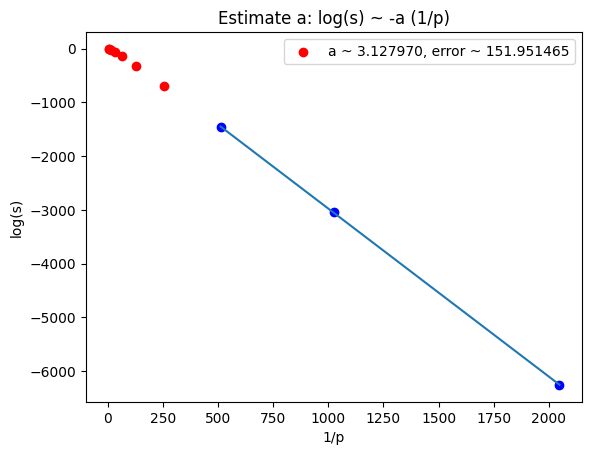

In [11]:
truncateB = len(m_array) - 3

p_inverse = np.divide(1, p)
log_s = - minus_log_s
reg = LinearRegression().fit(p_inverse[truncateB:].reshape(-1,1), log_s[truncateB:])
coef = reg.coef_[0]
inter = reg.intercept_

plt.title("Estimate a: log(s) ~ -a (1/p)")
plt.xlabel("1/p")
plt.ylabel("log(s)")
plt.scatter(p_inverse[0:truncateB], log_s[0:truncateB], color="red")
plt.scatter(p_inverse[truncateB:], log_s[truncateB:], color="blue")
plt.plot([p_inverse[truncateB], p_inverse[-1]], [inter + coef * p_inverse[truncateB],
                                                     inter + coef * p_inverse[-1]])
plt.legend(["a ~ {:.6f}, error ~ {:.6f}".format(-coef, inter)])

**Report C:** - Estimate $\beta$:

Assume:
$$
s \sim \exp \Big\{ -\frac{\pi^2}{3 p} + b p^\beta \Big\}
$$
$$
p \log(s) + \frac{\pi^2}{3} \sim b p^{\beta + 1} = b \Big( \frac{1}{p} \Big)^{-1 - \beta}
$$
$$
\log(p \log(s) + \frac{\pi^2}{3}) \sim \log(b) - (1 + \beta) \cdot \log ( 1/p )
$$

Here `log_p_log_s_plus_a` $= \log(p \log(s) + \frac{\pi^2}{3})$.

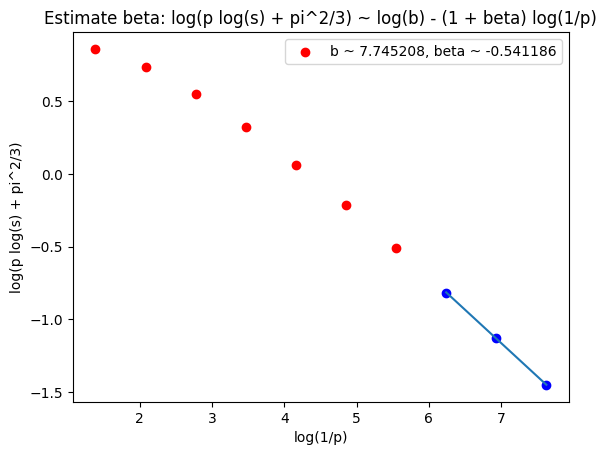

In [12]:
truncateC = len(m_array) - 3

p_inverse = np.divide(1, p)
log_p_inverse = np.log(p_inverse)
p_log_s = np.multiply(p, log_s)
p_log_s_plus_a = p_log_s + (math.pi**2)/3
log_p_log_s_plus_a = np.log(p_log_s_plus_a)
reg = LinearRegression().fit(log_p_inverse[truncateC:].reshape(-1,1), log_p_log_s_plus_a[truncateC:])
coef = reg.coef_[0]
inter = reg.intercept_

plt.title("Estimate beta: log(p log(s) + pi^2/3) ~ log(b) - (1 + beta) log(1/p)")
plt.xlabel("log(1/p)")
plt.ylabel("log(p log(s) + pi^2/3)")
plt.scatter(log_p_inverse[0:truncateC], log_p_log_s_plus_a[0:truncateC], color="red")
plt.scatter(log_p_inverse[truncateC:], log_p_log_s_plus_a[truncateC:], color="blue")
plt.plot([log_p_inverse[truncateC], log_p_inverse[-1]], [inter + coef * log_p_inverse[truncateC],
                                                     inter + coef * log_p_inverse[-1]])
plt.legend(["b ~ {:.6f}, beta ~ {:.6f}".format(exp(inter), -coef - 1)])

**Report D:** - Estimate b.

Assume:
$$
s \sim \exp \Big\{ -\frac{\pi^2}{3 p} + \frac{b}{\sqrt{p}} \Big\}
$$
$$
p \log(s) + \frac{\pi^2}{3} \sim b \sqrt{p} = b \Big( \frac{1}{p} \Big)^{-1/2}
$$
$$
\Big( p \log(s) + \frac{\pi^2}{3} \Big)^{-2} \sim b^{-2} \Big( \frac{1}{p} \Big)
$$

Here `p_log_s_plus_a_minus_two` $= \Big( p \log(s) + \frac{\pi^2}{3} \Big)^{-2}$

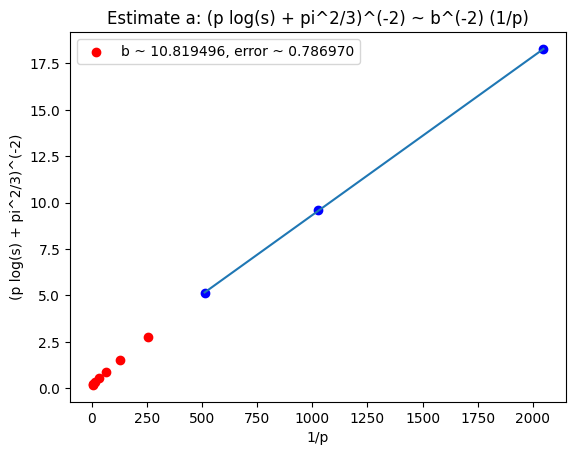

In [14]:
truncateD = len(m_array) - 3

p_inverse = np.divide(1, p)
log_p_inverse = np.log(p_inverse)
p_log_s = np.multiply(p, log_s)
p_log_s_plus_a = p_log_s + (math.pi**2)/3
p_log_s_plus_a_minus_two = p_log_s_plus_a ** (-2)
reg = LinearRegression().fit(p_inverse[truncateC:].reshape(-1,1), p_log_s_plus_a_minus_two[truncateC:])
coef = reg.coef_[0]
inter = reg.intercept_

#plt.subplot(2, 3, 1)
plt.title("Estimate a: (p log(s) + pi^2/3)^(-2) ~ b^(-2) (1/p)")
plt.xlabel("1/p")
plt.ylabel("(p log(s) + pi^2/3)^(-2)")
plt.scatter(p_inverse[0:truncateC], p_log_s_plus_a_minus_two[0:truncateC], color="red")
plt.scatter(p_inverse[truncateC:], p_log_s_plus_a_minus_two[truncateC:], color="blue")
plt.plot([p_inverse[truncateC], p_inverse[-1]], [inter + coef * p_inverse[truncateC],
                                                     inter + coef * p_inverse[-1]])
plt.legend(["b ~ {:.6f}, error ~ {:.6f}".format(math.sqrt(1/coef), inter)])